# Your Uni : xh2604 and mm6712
# Your Full name : Xiyun Hu and Mathis Mallet
# Link to your Public Github repository with Final report  : https://github.com/MathisMallet/Advanced-Machine-Learning


# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Get data in and set up X_train / X_test / y_train
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Get data in and set up X_train, X_test, y_train objects

**Instructions:**
Upload the world_happiness_competition_data.zip and newcountryvars.csv files on Colab by pressing the Folder icon on left tab (Shows "Files" on hovering), and then clicking the left-most file upload button (Shows "Upload to Session Storage" Alt text on hovering)

### Warning: run only once

In [34]:
# Get training data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
import os


# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall()

In [35]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data\\X_train.csv') # Load train features to train on
X_test =  pd.read_csv("world_happiness_competition_data\\X_test.csv") # Load test features to predict on
y_train =  pd.read_csv("world_happiness_competition_data\\y_train.csv") # Load y train (true labels)
y_test =  pd.read_csv("world_happiness_competition_data\\y_test.csv") # Load y test (true labels)
y_train_labels = y_train.idxmax(axis=1) # Examine what this does and write in next cell
y_test_labels = y_test.idxmax(axis=1) # Complete in a similar manner as above

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Latvia,1.187,1.465,0.812,0.264,0.075,0.064,Latvia,Europe,Northern Europe,125.611111
1,Burundi,0.046,0.447,0.380,0.220,0.176,0.180,Burundi,Africa,Sub-Saharan Africa,155.000000
2,Belarus,1.067,1.465,0.789,0.235,0.094,0.142,Belarus,Europe,Eastern Europe,4.000000
3,Liberia,0.073,0.922,0.443,0.370,0.233,0.033,Liberia,Africa,Sub-Saharan Africa,1419.095238
4,Ecuador,0.912,1.312,0.868,0.498,0.126,0.087,Ecuador,Americas,Latin America and the Caribbean,5.000000


Write in the next cell what the y_train_labels = y_train.idxmax(axis=1) line does. What is the difference between y_train_labels and y_train?

Your answer: The initial DataFrame contains samples in rows and labels in columns. Each row is given a label by having the value 1 for one column, and 0 for all the others.The DataFrame attribute .idxmax(axis) return a list of the lengh of the Dataframe rows containing their corresponding labels (str)? It does that by returning a list where each alement is the name of the column for which the value is maximal (i.e 1 in our case), thus being the sample's label.

##  Add new data

In [36]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [37]:
# Merge in new data to X_train and X_test by taking "Country or region" from first table and "country_name" from 2nd table.

X_train = pd.merge(X_train, countrydata, left_on="Country or region", right_on="country_name", how='left') #We remove 6 countries without enough data
X_test = pd.merge(X_test, countrydata, left_on="Country or region", right_on="country_name", how='left')
X_train = X_train.drop(columns =["country_name"])
X_test = X_test.drop(columns =["country_name"])

In [38]:
X_train.head(1)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Latvia,1.187,1.465,0.812,0.264,0.075,0.064,Latvia,Europe,Northern Europe,125.611111,1949670.0,25.5,0.829862,74.342,15.97411,11.736418,22589.17355


# EDA

In [40]:
print(X_train.dtypes)

Country or region                 object
GDP per capita                   float64
Social support                   float64
Healthy life expectancy          float64
Freedom to make life choices     float64
Generosity                       float64
Perceptions of corruption        float64
name                              object
region                            object
sub-region                        object
Terrorist_attacks                float64
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

X_train.dtypes reveals the type of data stored in each column of the DataFrame X_train. For instance "GDP per capita" data are floats, while "country_name" are objects.

Find out the number and percentage of missing values in the table per column

In [43]:
print("Training data missing values (%)")
print(X_train.isnull().sum()/(len(X_train))*100, "\n")
print("Testing data missing values (%)")
print(X_test.isnull().sum()/(len(X_test))*100)

Training data missing values (%)
Country or region                 0.000000
GDP per capita                    0.000000
Social support                    0.000000
Healthy life expectancy           0.000000
Freedom to make life choices      0.000000
Generosity                        0.000000
Perceptions of corruption         0.000000
name                              0.000000
region                            0.000000
sub-region                        0.000000
Terrorist_attacks                 0.000000
population                        8.695652
population_below_poverty_line    15.942029
hdi                               8.695652
life_expectancy                   8.695652
expected_years_of_schooling       8.695652
mean_years_of_schooling           8.695652
gni                               8.695652
dtype: float64 

Testing data missing values (%)
Country or region                 0.000000
GDP per capita                    0.000000
Social support                    0.000000
Healthy life ex

Plot the frequency distribution / histogram of some of the numerical features that you think are important

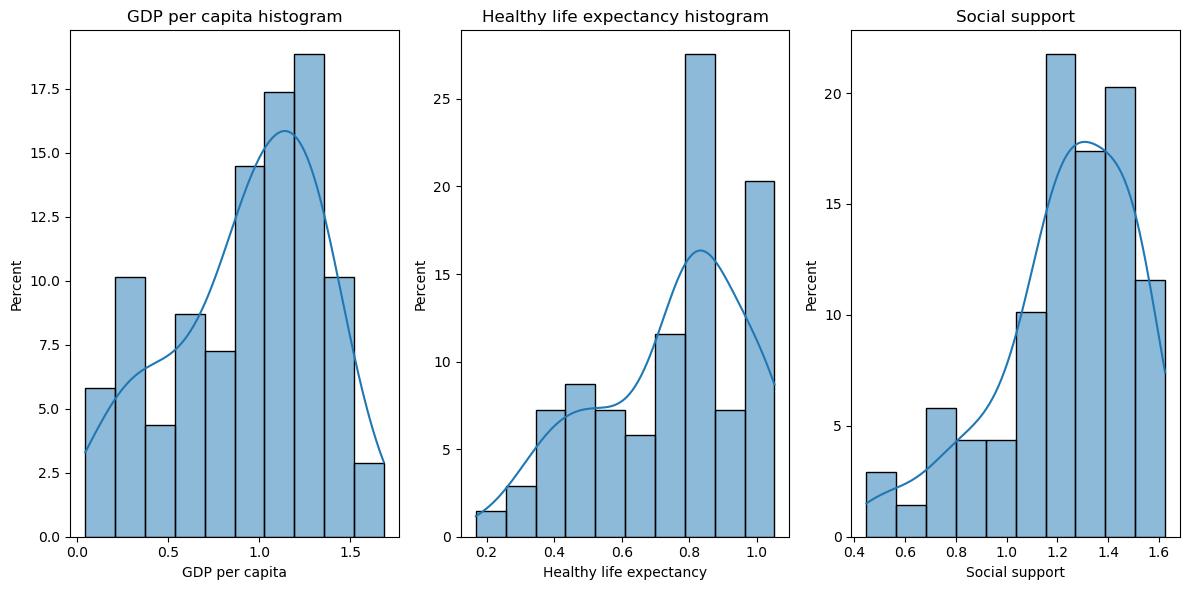

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# figure initialization
plt.figure(figsize=(12, 6))

# 'GDP per capita' histogram
plt.subplot(1, 3, 1)
sns.histplot(X_train["GDP per capita"], bins=10, kde=True, stat="percent")
plt.title("GDP per capita histogram")

# "Healthy life expectancy" histogram
plt.subplot(1, 3, 2)
sns.histplot(X_train["Healthy life expectancy"], bins=10, kde=True, stat="percent")
plt.title("Healthy life expectancy histogram")

# "Social support" histogram
plt.subplot(1, 3, 3)
sns.histplot(X_train['Social support'], bins=10, kde=True, stat="percent")
plt.title('Social support')

plt.tight_layout()
plt.show()

Plot the categorical variables and their distribution

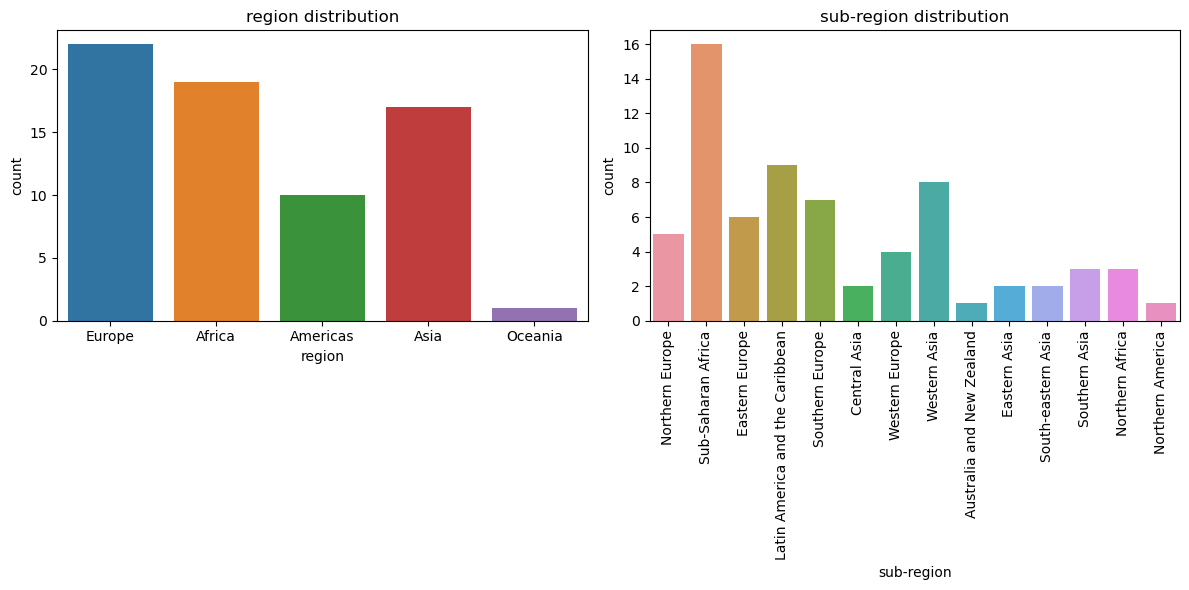

In [59]:
# figure initialization
plt.figure(figsize=(12, 6))

# "Social support" histogram
plt.subplot(1, 2, 1)
sns.countplot(x="region", data= X_train)
plt.title('region distribution')

# "sub-region" histogram
plt.subplot(1, 2, 2)
sns.countplot(x="sub-region", data= X_train)
plt.xticks(rotation=90)
plt.title('sub-region distribution')

plt.tight_layout()
plt.show()

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

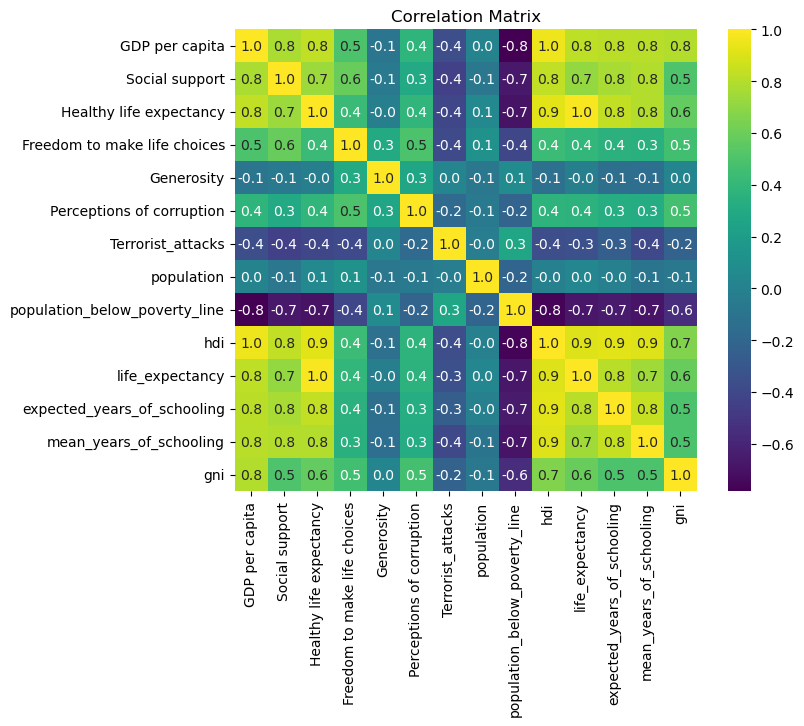

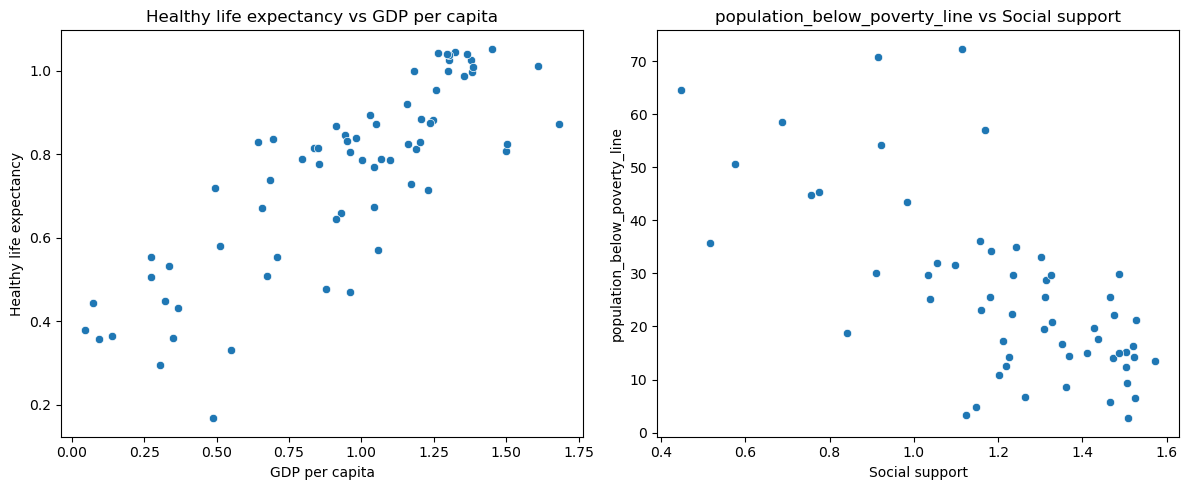

           GDP per capita  Social support  Healthy life expectancy  \
Happiness                                                            
Average          0.978231        1.238769                 0.817000   
High             1.111353        1.394176                 0.851706   
Low              0.764333        1.092417                 0.599583   
Very High        1.400385        1.479923                 0.985077   
Very Low         0.393071        0.910571                 0.464857   

           Freedom to make life choices  Generosity  \
Happiness                                             
Average                        0.305538    0.160231   
High                           0.409824    0.139941   
Low                            0.328083    0.144750   
Very High                      0.539000    0.250769   
Very Low                       0.248929    0.228357   

           Perceptions of corruption  Terrorist_attacks    population  \
Happiness                                         

In [77]:
#Correlation Matrix
X_train_num = X_train.select_dtypes(exclude=['object'])
correlation_matrix = X_train_num.corr()
#Ploting of the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='viridis', square=True)
plt.title('Correlation Matrix')
plt.show()

# Bivariate analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x="GDP per capita", y="Healthy life expectancy", data= X_train_num)
plt.title("Healthy life expectancy vs GDP per capita")
plt.subplot(1, 2, 2)
sns.scatterplot(x="Social support", y="population_below_poverty_line", data= X_train_num)
plt.title("population_below_poverty_line vs Social support")

plt.tight_layout()
plt.show()

#Grouped analysis
X_train_temp = X_train_num
X_train_temp["Happiness"] = y_train_labels
grouped_means = X_train_temp.groupby("Happiness").mean()
print(grouped_means)

Write what you observed and your General comments on what should be done:

Answer to check:

A good part of the variables seems well correlated, some are anticorelated too, but the "population" and "Generosity" variables aren't very correlated to the other variables. 

However we see that those two variables don't have the same mean value in the group analysis for different happiness values. Thus, it may be interesting to keep them as they are the lone conveyor of the information they carry.

##2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [78]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(exclude=['object'])
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")), # we replace the missing value by the mean instead of 0 to avoid a huge bias by saying for example that the population is of 0 when the value is missing
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer',  SimpleImputer(strategy='most_frequent')), #we replace the missing value by the most frequent value
    ('onehot', OneHotEncoder(handle_unknown= "ignore"  ))]) #we don't raise an error when we face an unknown category

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In a first step we extract the names of the columns with numeric features in the variable "numeric features"
Then we creat a transfomer that is meant to replace missing values by the mean value and then scale the data to be centered and normalized. We change the value of SimpleImputer's strategy to mean to limit the bias of missing values that would have been present if they were replaced by 0. The sclaing of the data is meant to improve the convergence of the neural network with comparable values between categories.
The next step is to prepare the transformer of categorical values, with first a step that replace missing values by the most frequent categorical value (the "Modal value") and then encode the value in a normalised format that helps the neural network training. We also ignore new categories to avoid errors if a new one happen to exist.

Eventually we finalize our transformers in a columnTransformer, associating columns of numerical values with the numerical transformer, and columns of categorical values with the categorical transformer.

Then the last step is to fit the preprocessor (containing the transformers) with data X_train using the attribute .fit().

In [80]:
# Write function to transform data with preprocessor
def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

The "preprocess" is the "preprocessor" fitted to the data X_train. The preprocessor function apply the preprocess to the dataframe inputed as an argument and return the preprocessed_dat, which is the data transformed by the preprocess.

In [81]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(69, 33)

##3. Fit model on preprocessed data and save preprocessor function and model


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100) #add random_state for reproductbility 

model.fit(preprocessor(X_train), y_train) #Fit the model

#Score the model
y_pred = model.predict(preprocessor(X_test))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

# Your cell should have a score between 0-1 as output

Accuracy of the model: 0.37


## 4. Generate predictions from X_test data and compare it with true labels in Y_test.csv file


In [ ]:
#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels


## 5. Repeat submission process to improve place on leaderboard


In [ ]:
# Train model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

model_2 = ## Make a new model with changed parameters to improve the score

 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [ ]:
## Your answer :

In [ ]:
#Evaluate Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels = # Predict

## Write code to show model performance by comparing prediction_labels with true labels


Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [ ]:
## Your answer:

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = # Use np.arange to create a sequence of numbers for each parameter's space you think should be searched

gridmodel = # Read GridSearchCV docs and create an object with RandomForestClassifier as the model

#use model methods to fit score and predict model:


#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


In [ ]:
#Submit Model 3:

#-- Generate predicted values


## Write code to show model performance by comparing prediction_labels with true labels


In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


model = ## Read documentations of imported models and fit them.

#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [ ]:
## Your answer:

# 6. Basic Deep Learning

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=#count features in input data

keras_model = ## Define a Neural Network Model with 5 layers 128->64->64->32->(?)


#Use Softmax activation in last layer. How many neurons should there be in the last layer?



# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [ ]:
## Your answer:

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [ ]:
## Your answer:

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [ ]:
## Your answer:

Can you try getting the model's training history out and plotting the curves?

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)

In [ ]:
#-- Generate predicted y values

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index= # Predict

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

## Write code to show model performance by comparing prediction_labels with true labels


In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

In [ ]:
## Your Code and Answer:

# 7. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked

In [ ]:
Ask about the fit of the preprocessor
ask about the pipeline for the random forest and if preprocessor(X_test)